# Методичка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

**LinearRegression**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


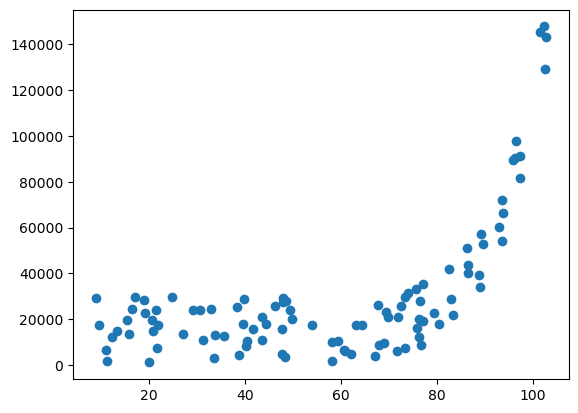

In [3]:
X = data.x
y = data.y
plt.scatter(X, y)

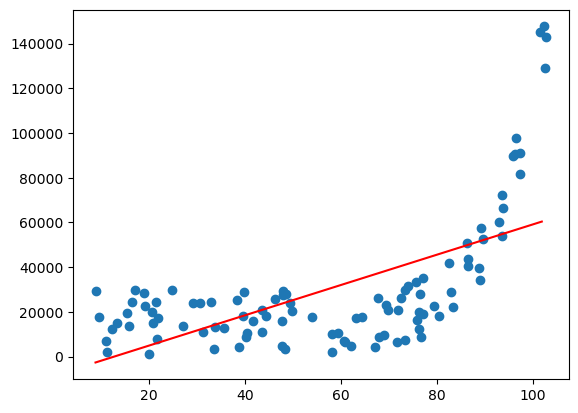

In [4]:
X = pd.DataFrame(X)

linear = LinearRegression().fit(X, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame({'x': xx}))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [5]:
linear.score(X, y)

0.37467360318911636

**PolynomialFeatures**

In [6]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

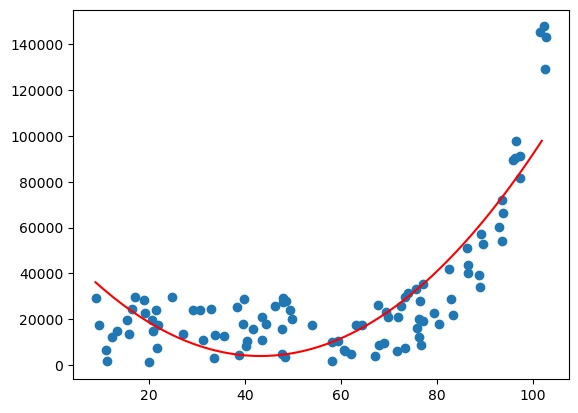

In [7]:
poly_2d = LinearRegression().fit(X_2, y)

xx_2d = transformation.transform(pd.DataFrame({'x': xx}))

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [8]:
poly_2d.score(X_2, y)

0.7359753787024843

**LogisticRegression**

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


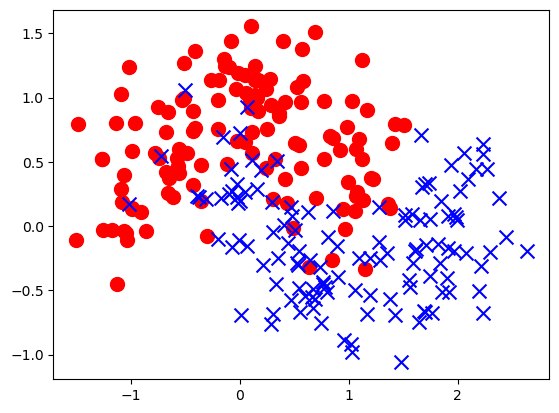

In [10]:
y = data.y
X = data.drop(["y"], axis=1)

plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

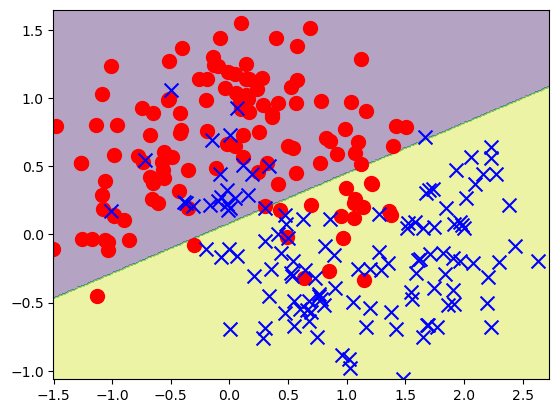

In [11]:
logistic = LogisticRegression().fit(X, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(pd.DataFrame({'x1': XX[:,0], 'x2': XX[:,1]})).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [12]:
logistic.score(X, y)

0.832

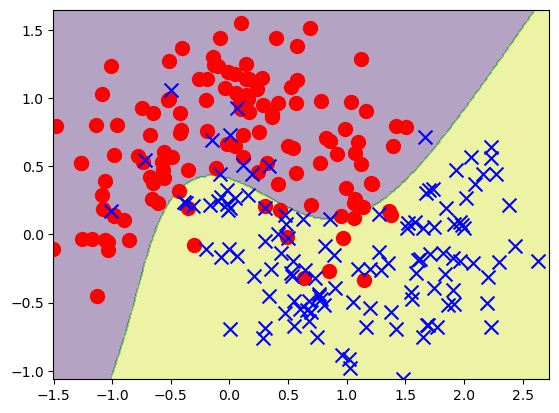

In [13]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

class_3 = LogisticRegression().fit(X_3, y)

Z = class_3.predict(class_transform.transform(pd.DataFrame({'x1': XX[:,0], 'x2': XX[:,1]}))).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [14]:
class_3.score(X_3, y)

0.9

**King county**

In [15]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [16]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [18]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109157

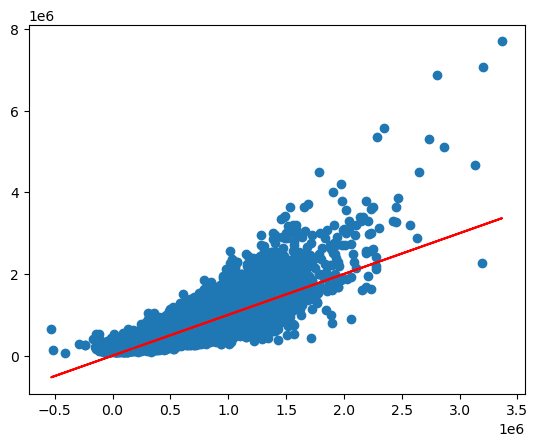

In [19]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [20]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
X_3_kc_prices.shape

(21613, 1330)

In [21]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8647140430956675

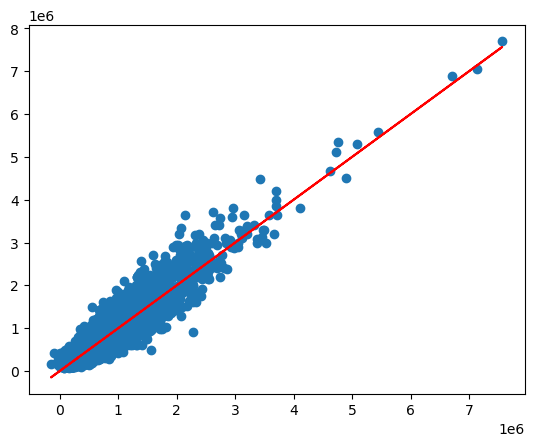

In [22]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

# Задания для самостоятельного выполнения

1. В выполненной работе добавьте замер времени обучения каждой модели.
2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.
3. То же самое проделайте с датасетом для классификации и "King county".
4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.
5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.
6. Попробуйте также проинтерпретировать полиномиальную модель.

**1. В выполненной работе добавьте замер времени обучения каждой модели.**

In [23]:
import time
def print_time(start):
    print(time.time() - start)

0.024370908737182617


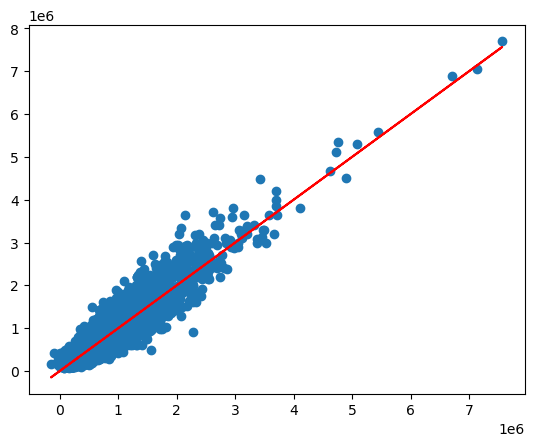

In [24]:
st = time.time()

y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

print_time(st)

0.04094409942626953


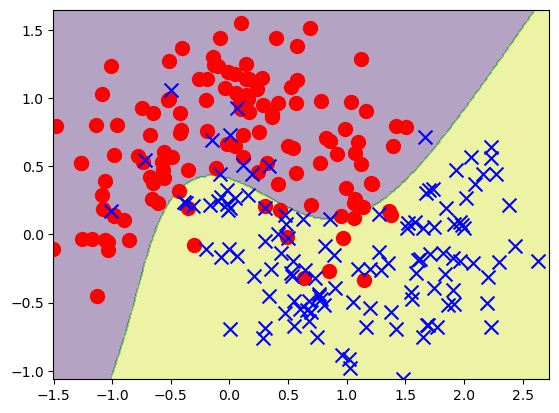

In [25]:
st = time.time()

class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

class_3 = LogisticRegression().fit(X_3, y)

Z = class_3.predict(class_transform.transform(pd.DataFrame({'x1': XX[:,0], 'x2': XX[:,1]}))).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

print_time(st)

**2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.**

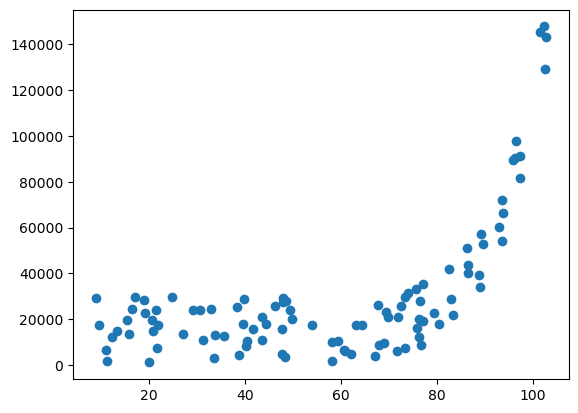

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

X = data.x
y = data.y

X = pd.DataFrame(X)
plt.scatter(X, y)

0.013586044311523438


0.9217478060447011

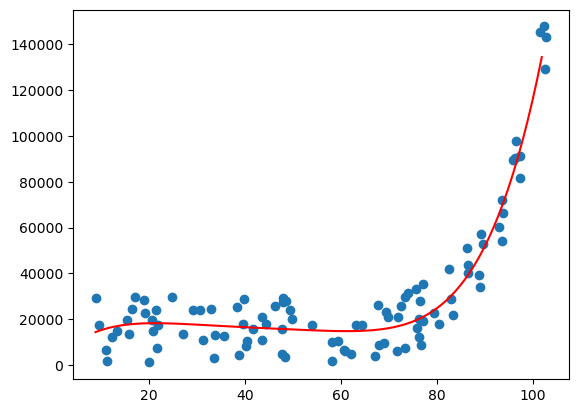

In [27]:
#5 порядок
st = time.time()

transformation = PolynomialFeatures(degree=5)
transformation.fit(X)
X_5 = transformation.transform(X)

poly_5d = LinearRegression().fit(X_5, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
xx_5d = transformation.transform(pd.DataFrame({'x': xx}))

yy_5d = poly_5d.predict(xx_5d)
plt.scatter(X.x, y)
plt.plot(xx, yy_5d, c='r')

print_time(st)
poly_5d.score(X_5, y)

0.06071901321411133


0.9232002062578246

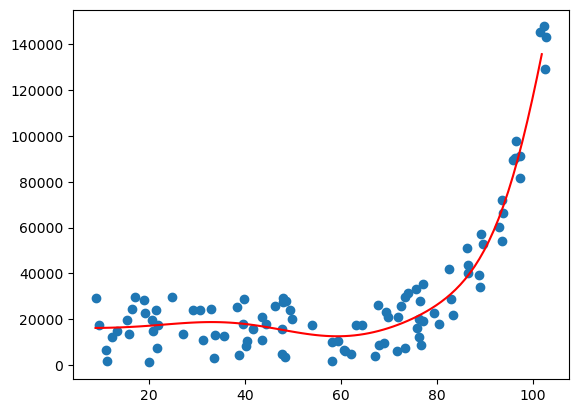

In [28]:
#10 порядок
st = time.time()

transformation = PolynomialFeatures(degree=10)
transformation.fit(X)
X_10 = transformation.transform(X)

poly_10d = LinearRegression().fit(X_10, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
xx_10d = transformation.transform(pd.DataFrame({'x': xx}))

yy_10d = poly_10d.predict(xx_10d)
plt.scatter(X.x, y)
plt.plot(xx, yy_10d, c='r')

print_time(st)
poly_10d.score(X_10, y)

0.013458967208862305


0.789540652872601

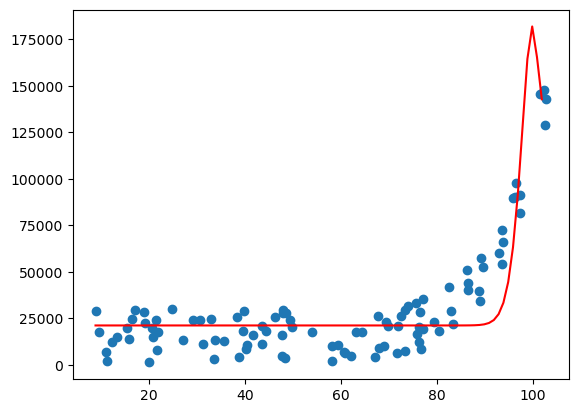

In [29]:
#100 порядок
st = time.time()

transformation = PolynomialFeatures(degree=100)
transformation.fit(X)
X_100 = transformation.transform(X)

poly_100d = LinearRegression().fit(X_100, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
xx_100d = transformation.transform(pd.DataFrame({'x': xx}))

yy_100d = poly_100d.predict(xx_100d)
plt.scatter(X.x, y)
plt.plot(xx, yy_100d, c='r')

print_time(st)
poly_100d.score(X_100, y)

**3. То же самое проделайте с датасетом для классификации и "King county". (классификация)**

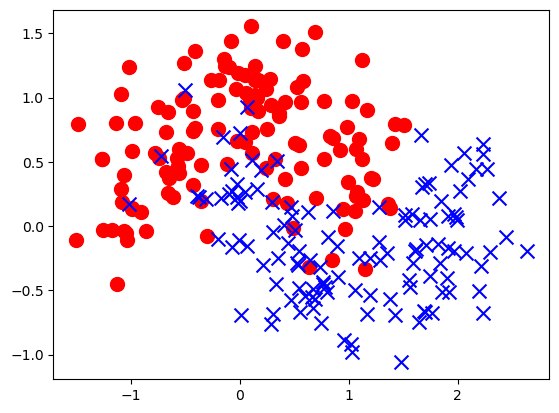

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

y = data.y
X = data.drop(["y"], axis=1)

plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

0.10811901092529297


0.916

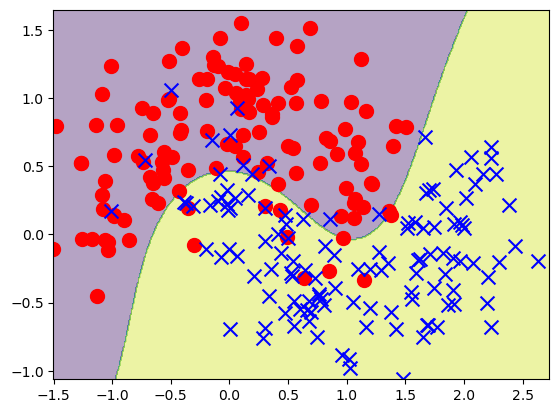

In [31]:
#5 порядок
st = time.time()

class_transform = PolynomialFeatures(degree=5, include_bias=False)
X_5 = class_transform.fit_transform(X)

class_5 = LogisticRegression().fit(X_5, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = class_5.predict(class_transform.transform(pd.DataFrame({'x1': XX[:,0], 'x2': XX[:,1]}))).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

print_time(st)
class_5.score(X_5, y)

0.18221712112426758


0.924

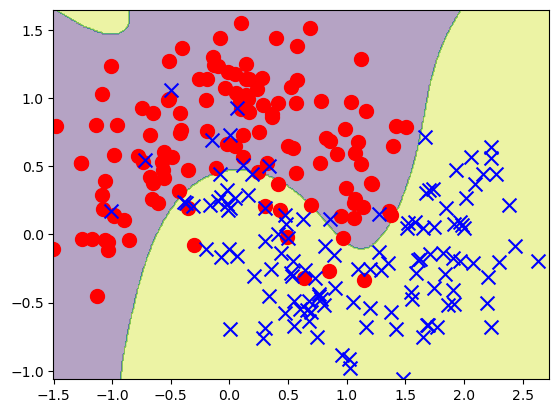

In [32]:
#10 порядок
st = time.time()

class_transform = PolynomialFeatures(degree=10, include_bias=False)
X_10 = class_transform.fit_transform(X)

class_10 = LogisticRegression().fit(X_10, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = class_10.predict(class_transform.transform(pd.DataFrame({'x1': XX[:,0], 'x2': XX[:,1]}))).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

print_time(st)
class_10.score(X_10, y)

/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


12.906274795532227


0.5

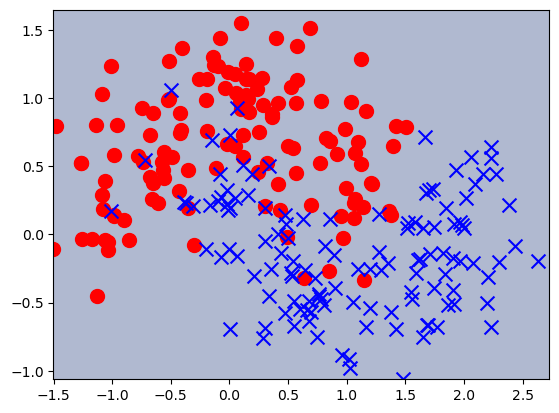

In [33]:
#100 порядок
st = time.time()

class_transform = PolynomialFeatures(degree=100, include_bias=False)
X_100 = class_transform.fit_transform(X)

class_100 = LogisticRegression().fit(X_100, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = class_100.predict(class_transform.transform(pd.DataFrame({'x1': XX[:,0], 'x2': XX[:,1]}))).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

print_time(st)
class_100.score(X_100, y)

**3. То же самое проделайте с датасетом для классификации и "King county". (King county)**

In [34]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [35]:
#5 порядок
#st = time.time()
#X_5_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=5)).fit_transform(X_kc_prices)

#reg_poly5_kc = LinearRegression().fit(X_5_kc_prices, y_kc_prices)
#reg_poly5_kc.score(X_5_kc_prices, y_kc_prices)

#y_pred_kc_prices = reg_poly5_kc.predict(X_5_kc_prices)
#plt.scatter(y_pred_kc_prices, y_kc_prices)
#plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

#print_time(st)
#reg_poly5_kc.score(X_5_kc_prices, y_kc_prices)

In [36]:
#10 и 100 порядки
#...

**4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.**

**5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.**

In [37]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

pd.DataFrame({'Атрибут': X_kc_prices.columns, 'Коэффициент': reg_kc_multiple.coef_})

,Атрибут,Коэффициент
0,bedrooms,-35766.541444
1,bathrooms,41144.278533
2,sqft_living,110.442865
3,sqft_lot,0.128598
4,floors,6689.550115
5,waterfront,582960.458424
6,view,52870.942384
7,condition,26385.649139
8,grade,95890.445151
9,sqft_above,70.785224


**6. Попробуйте также проинтерпретировать полиномиальную модель.**